In [1]:
%run UtilFunctions


retrying after...6secs
retrying after...7secs
retrying after...6secs
retrying after...7secs


In [2]:

Alltracks = collect_all_tracks('Daft Punk', 'album')
Audiofeatures = cleanData(Alltracks)
alltracks = AllTracksArtist(['Daft Punk'])

retrying after...5secs
retrying after...4secs
retrying after...7secs
retrying after...6secs
retrying after...6secs


In this notebook I'm having a look at how artist change when they become a commercial succes. To not make it to overwelming I will start with analyzing only one artist. The artist I choose is daftpunk, I choose them because they are widely known and always had a distinct sound.


### Studio Album analysis
Daft Punk made four studio albums
- Homework 
- Discovery
- Human After All
- Random Access Memories

Daft Punk is known for there creative use of samples, for those who are interested I added a link below . With Random Access Memories they made a shift and had a more instrument focused studio album, this makes me expect a more acoustical album and less danceable.


In [3]:
IFrame(src='https://www.youtube.com/embed/3XaqDcg8KEo', width="100%", height=200)

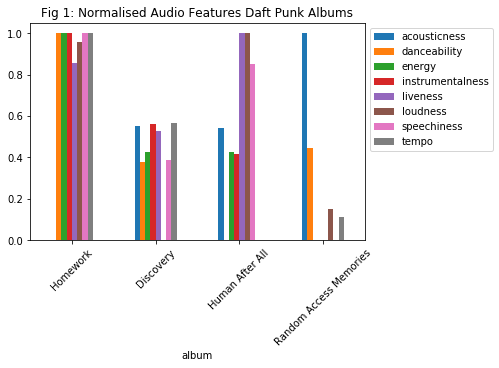

In [4]:
df = alltracks['Daft Punk']
dfAlbums = df.groupby('album').mean().drop(['Musique, Vol. 1','Alive 2007','Daft Club','Daft Club','TRON: Legacy Reconfigured', 'TRON: Legacy','Get Lucky (feat. Pharrell Williams & Nile Rodgers) [Radio Edit]'])
dfAlbums = dfAlbums.drop(['track_number','time_signature','duration_ms','popularity','valence'],axis=1)# ['time_signature', 'track_number']
dfAlbumsNormalised= scaleMinMax(dfAlbums)
dfAlbumsNormalised = dfAlbumsNormalised.reindex(['Homework','Discovery', 'Human After All', 'Random Access Memories'])

ax = dfAlbumsNormalised.plot(kind='bar',rot=45,title="Fig 1: Normalised Audio Features Daft Punk Albums").legend(bbox_to_anchor=(1., 1))



Note! the values are normalised, I can only say something about the relative features.

As we can see the first album was not the least acoustical and had the highest danceability. The release of Homework made [French House](https://en.wikipedia.org/wiki/French_house) a populair genre. 

Discovery isn't as high in danceability as Homework eventhough is has some of the catchiest tracks a big part of the album are less housy tracks.

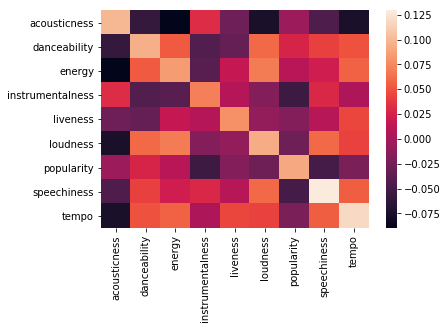

In [5]:
dfCov= df

dfCov = dfCov.groupby('album').mean()
dfCov = dfCov.drop(['track_number','time_signature','duration_ms','valence'],axis=1)
dfCovNorm=scaleMinMax(dfCov).cov()
sn.heatmap(dfCovNorm, annot=False, fmt='g')


The Covariance matrix shows some interesting dependencies:
- Instrumentalness and acousticness are highly correlated.
- Dancability and 

Lets have a closer look at the correlations

In [6]:
s = dfCovNorm.unstack()
results = s.sort_values(kind="quicksort")
print("Negative Correlating factors:\n",results[0:6],"\n\n","Positive Correlating factors:\n",results[-15:-9])

Negative Correlating factors:
 energy        acousticness   -0.089689
acousticness  energy         -0.089689
loudness      acousticness   -0.075046
acousticness  loudness       -0.075046
              tempo          -0.074940
tempo         acousticness   -0.074940
dtype: float64 

 Positive Correlating factors:
 danceability  loudness        0.060310
loudness      danceability    0.060310
              speechiness     0.060363
speechiness   loudness        0.060363
energy        loudness        0.069393
loudness      energy          0.069393
dtype: float64


The sample size is not large enough to make real assumptions. The more Acoustic a Daftpunk track is the less energy, loudness.
An increase in loudness increases the dancibility, this makes sense.. Ever been to a club?


In [70]:
df = alltracks['Daft Punk']
df = df.drop(['time_signature','track_number','duration_ms','tempo','loudness','acousticness'],axis=1)
df = df.groupby('TonalQuality').mean()
pd.DataFrame([df.max(), df.idxmax()])


,danceability,energy,instrumentalness,liveness,popularity,speechiness,valence
0,0.7578,0.86675,0.894667,0.3201,55.6,0.21814,0.6388
1,b major,g minor,c minor,g# major,a# minor,g# major,c major
